<a href="https://colab.research.google.com/github/preetu1912/preetu_aiml/blob/main/aiml_report_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSURANCE **PREDICTION**

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data = pd.read_csv('/content/insurance (1).csv')

print(data.shape)

data.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:

data.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
data['age'].value_counts()

,count
age,
18,69
19,68
50,29
51,29
47,29
46,29
45,29
20,29
48,29


In [ ]:
data['children'].value_counts()


,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:

data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:

data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Text(0.5, 1.0, 'Age vs Charges')

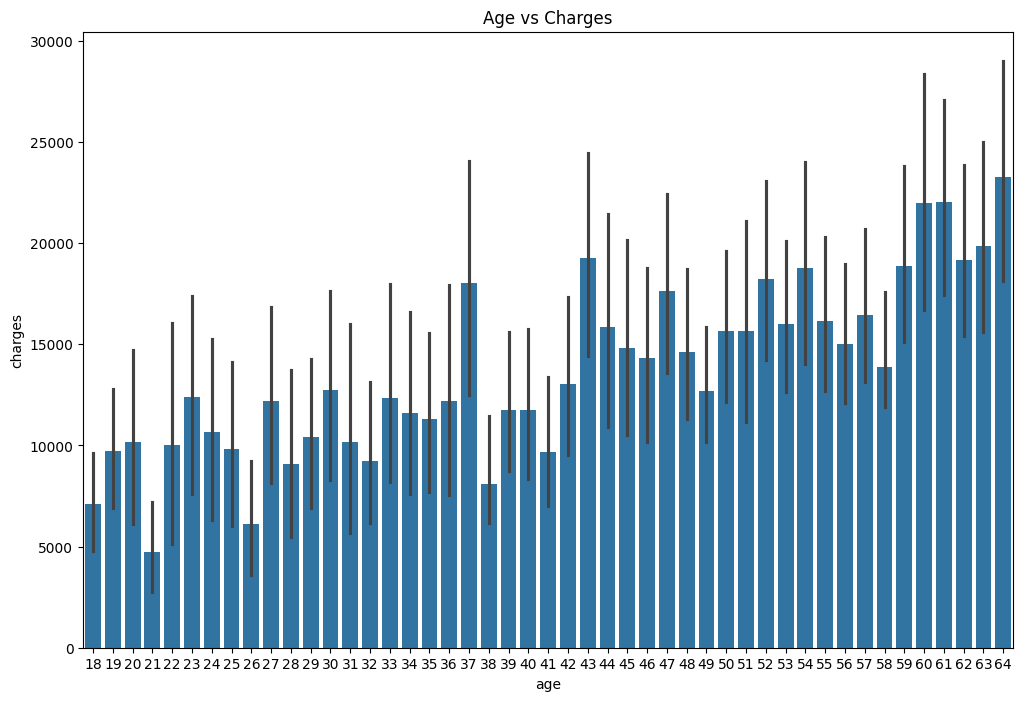

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = data)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

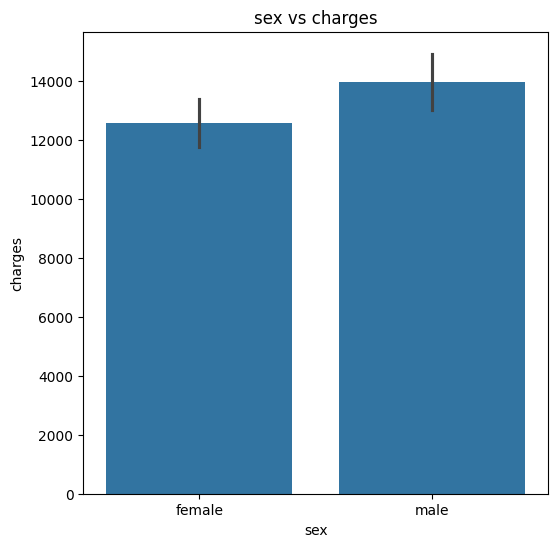

In [ ]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = data)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

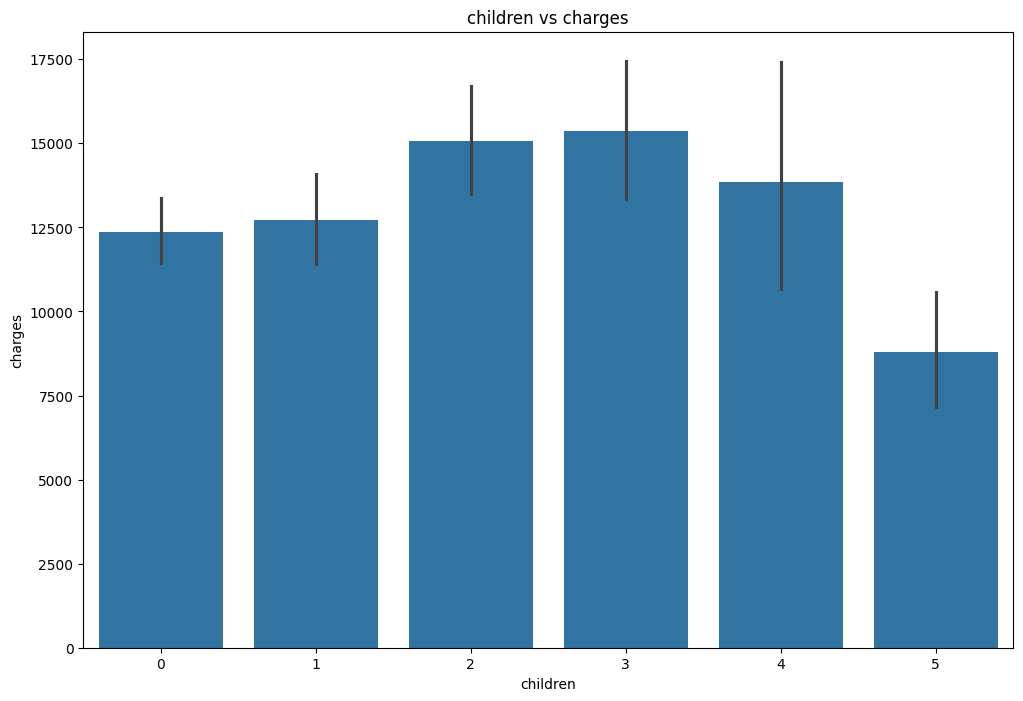

In [ ]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = data)

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

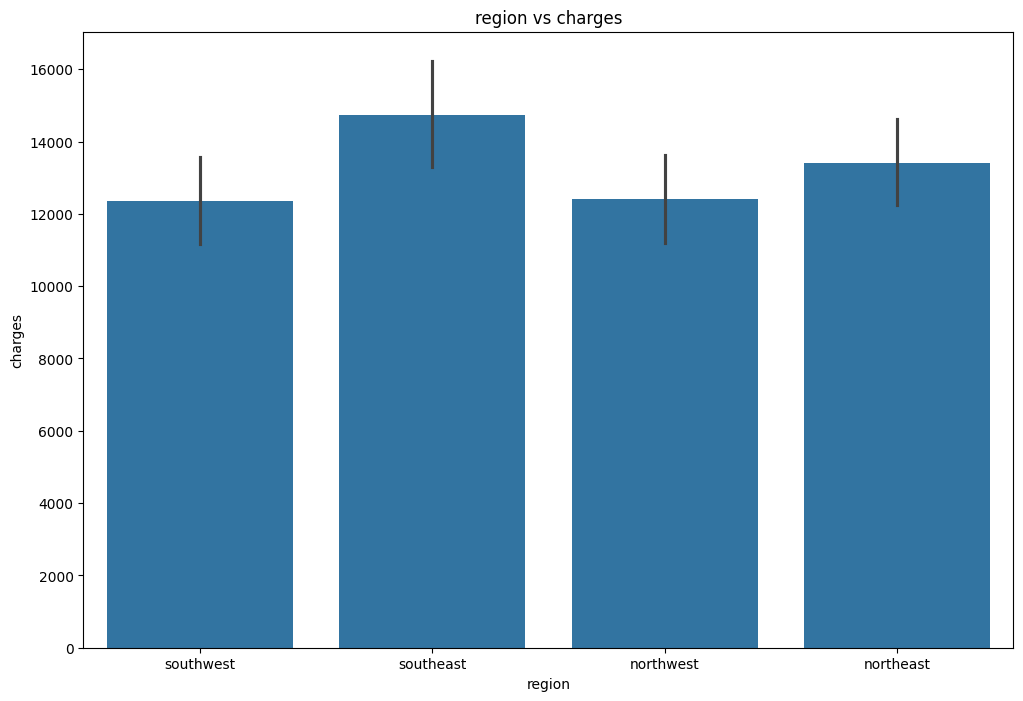

In [ ]:

# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

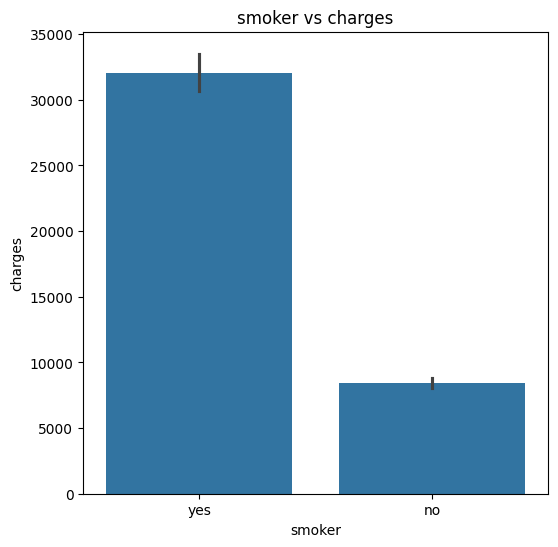

In [ ]:

# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data)

plt.title('smoker vs charges')

data preprocessng

In [ ]:
data = data.drop('region', axis = 1)

print(data.shape)

data.columns


(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [ ]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])


In [ ]:
data['sex'].value_counts()

,count
sex,
1,676
0,662


In [ ]:
data['smoker'].value_counts()


,count
smoker,
0,1064
1,274


In [ ]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [ ]:
# splitting the dataset into training and testing sets

# Import from model_selection instead of cross_validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


Modelling

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train))
print("r2 score :", r2)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)
+
# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)

MSE : 37806750.250076555
RMSE : 6148.719399198223
r2 score : 0.75490433195409


In [ ]:
y_test


,charges
338,41919.09700
620,3659.34600
965,4746.34400
128,32734.18630
329,9144.56500
...,...
580,12913.99240
786,12741.16745
321,24671.66334
903,8125.78450


In [ ]:
y_pred

array([34463.03582081,  5351.63285316,  5380.9763682 , 25960.03740848,
       12496.7519736 ,  6408.63819349,  4081.62037308,  9300.34454944,
       32957.30705757, 10937.63104598,  7519.13584334,  9726.30820152,
       34438.32925237, 11046.23596617,   819.90626006, 35368.51634447,
       11430.73775682,  8747.50405981, 28520.23066838, 10780.77269818,
         885.55261833,  8140.91449068,  7686.87521254, 10734.04414171,
       32605.85490348, 38733.33147903, 14385.6266007 ,  2947.77854767,
       10456.87417122, 14224.24201886,  1675.51537561, 30193.11285619,
         944.28091937, 14459.05536274, 12261.67368565,  8411.64973742,
        1863.86250159,  6487.85043844,   186.61387983,  8192.76868362,
        6366.87004436, 33513.53920691,  2007.49195393, 13551.24985198,
       10145.95016308, 29556.16908321,  4878.71697149,  2536.59789849,
        2321.4068302 ,  4974.23941116, 10987.31701618, 12416.97110239,
       11958.11247547,   878.6345611 , 10867.31696491,  7014.47673418,
      

Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 174595630.81989565
RMSE : 13213.46399775228
r2 score : -0.13187810353027452


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 21337544.579201937
RMSE : 4619.258011759241
r2 score : 0.8616717991230074


In [ ]:
print(y_pred)

[44255.88274077  5846.86072548  6081.042583   17177.21745046
 10484.10960605  5846.86072548  2595.35814518 10931.06992004
 42584.89839301 13353.80599418  6610.96994112 10259.48146195
 44661.09845987 13070.5112551   2651.18402353 25448.69843884
 10260.14913638  9019.64591809 18105.29829517 10093.25548237
  2651.18402353  6568.57858191 10669.29819676  7607.89314792
 24893.3603705  45701.99789612 13526.64216026  5556.02775401
  6937.39109759 10990.53979236  5074.20109433 37672.23889183
  2735.93432064 10661.96878088 13233.97999726  6568.57858191
  2637.71676492  6555.44312155  2651.18402353  6118.92400464
  7027.51613446 23625.71386826  4442.05616154 13185.94070746
  6610.96994112 38844.88762495  6603.82668745  2651.18402353
  3303.70950689  6505.0578109   7117.78405563 10273.66216952
 13301.77658611  2606.22235537  6937.39109759  7467.31368561
 20222.04727397  5412.9783931  13233.97999726  6473.60988303
 13212.55383875  6118.92400464 11051.63314797  5333.35036814
  2651.18402353  5846.86

In [ ]:
print(y_test)

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64


decision forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 39878747.07634422
RMSE : 6314.962159533834
r2 score : 0.7414718776181861
